In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

if platform.system() == 'Darwin':  # macOS
    mpl.rc('font', family='AppleGothic')

In [110]:
df = pd.read_excel('./136501_20250422091337053_excel.xlsx', engine='openpyxl')

print(df.head())

df

    통계표명:        1인 1일 스팸 수신량 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0     단위:       통/1인 1일 스팸수신량        NaN        NaN        NaN        NaN   
1     NaN             2019상반기    2019하반기    2020상반기    2020하반기    2021상반기   
2   이메일스팸                0.39       0.29       0.31       0.18       0.10   
3  휴대전화스팸                0.14       0.13       0.16       0.28       0.35   
4     출처:  한국인터넷진흥원「스팸수신량 조사」        NaN        NaN        NaN        NaN   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  
0        NaN        NaN        NaN        NaN         NaN         NaN  
1    2021하반기    2022상반기    2022하반기    2023상반기     2023하반기     2024상반기  
2       0.13       0.15       0.11       0.07        0.10        0.11  
3       0.29       0.26       0.25       0.24        0.35        0.43  
4        NaN        NaN        NaN        NaN         NaN         NaN  


/Users/snowykte/PyCharmMiscProject/.venv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계표명:,1인 1일 스팸 수신량,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,단위:,통/1인 1일 스팸수신량,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2019상반기,2019하반기,2020상반기,2020하반기,2021상반기,2021하반기,2022상반기,2022하반기,2023상반기,2023하반기,2024상반기
2,이메일스팸,0.39,0.29,0.31,0.18,0.10,0.13,0.15,0.11,0.07,0.10,0.11
3,휴대전화스팸,0.14,0.13,0.16,0.28,0.35,0.29,0.26,0.25,0.24,0.35,0.43
4,출처:,한국인터넷진흥원「스팸수신량 조사」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,주석:,"* 이메일 스팸은 ’01년부터, 휴대전화 스팸은 ’04년 부터 수신량을 조사하였음",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df = df.drop(index=[0, 4, 5])

df

,통계표명:,1인 1일 스팸 수신량,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
1,NaN,2019상반기,2019하반기,2020상반기,2020하반기,2021상반기,2021하반기,2022상반기,2022하반기,2023상반기,2023하반기,2024상반기
2,이메일스팸,0.39,0.29,0.31,0.18,0.10,0.13,0.15,0.11,0.07,0.10,0.11
3,휴대전화스팸,0.14,0.13,0.16,0.28,0.35,0.29,0.26,0.25,0.24,0.35,0.43


In [112]:
df.columns = df.iloc[0]
df = df.drop(index=1)
df = df.reset_index(drop=True)
df

1,NaN,2019상반기,2019하반기,2020상반기,2020하반기,2021상반기,2021하반기,2022상반기,2022하반기,2023상반기,2023하반기,2024상반기
0,이메일스팸,0.39,0.29,0.31,0.18,0.10,0.13,0.15,0.11,0.07,0.10,0.11
1,휴대전화스팸,0.14,0.13,0.16,0.28,0.35,0.29,0.26,0.25,0.24,0.35,0.43


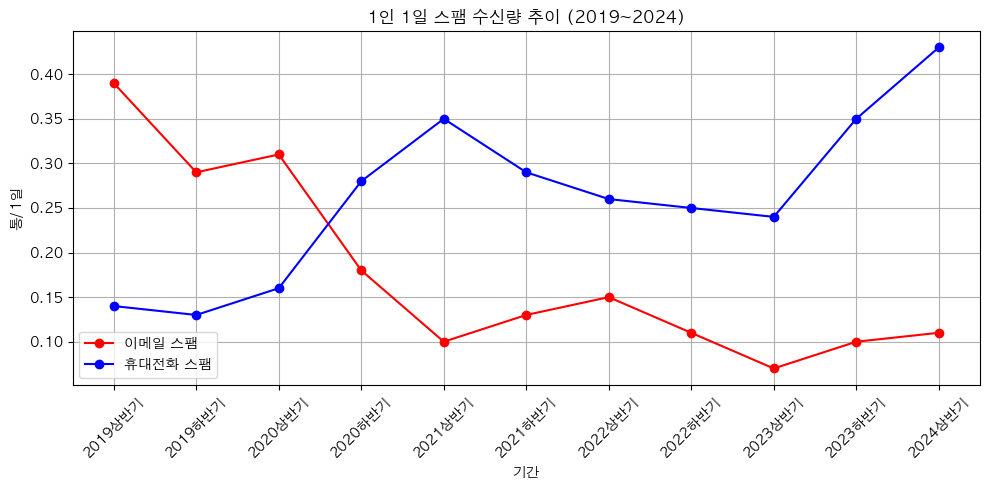

In [113]:
df = df.set_index(df.columns[0])
df = df.apply(pd.to_numeric, errors='coerce')

df_t = df.T

plt.figure(figsize=(10, 5))
plt.plot(df_t.index, df_t["이메일스팸"], marker='o', label="이메일 스팸", color='red')
plt.plot(df_t.index, df_t["휴대전화스팸"], marker='o', label="휴대전화 스팸", color='blue')

plt.title("1인 1일 스팸 수신량 추이 (2019~2024)")
plt.xlabel("기간")
plt.ylabel("통/1일")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()